# Parameter Estimation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

### Method of moments

##### example one

In [2]:
np.random.seed(2020)
calls = np.random.poisson(lam=20, size=365)

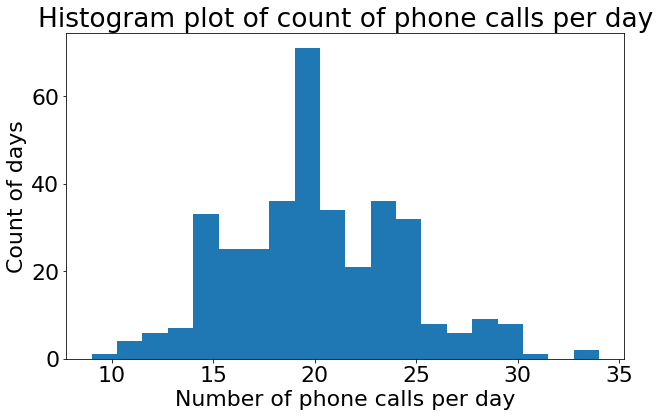

In [3]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,6))
plt.hist(calls,bins=20)
plt.xlabel("Number of phone calls per day")
plt.ylabel("Count of days")
plt.title("Histogram plot of count of phone calls per day");

In [4]:
np.mean(calls)

19.98904109589041

##### example two

In [5]:
np.random.seed(2020)
data = np.random.uniform(0,10,2000)

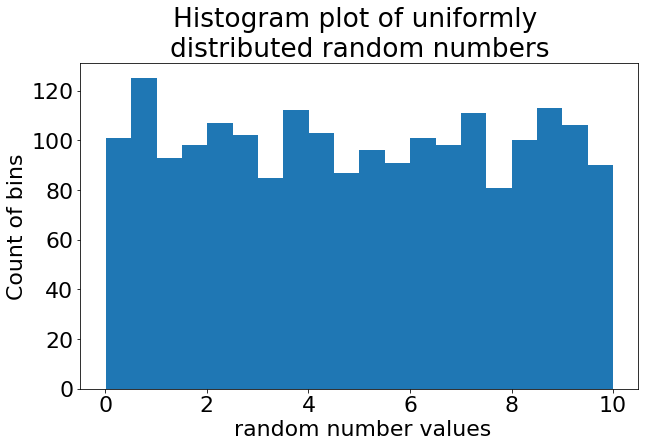

In [6]:
plt.figure(figsize=(10,6))
plt.hist(data, bins=20)
plt.xlabel(" random number values")
plt.ylabel("Count of bins")
plt.title("Histogram plot of uniformly \ndistributed random numbers");

In [7]:
M1 = np.mean(data)
M2 = np.mean(data**2)

In [8]:
alpha = M1 - np.sqrt(3*(M2-M1**2))
alpha

-0.09653500331245546

In [9]:
beta = 2*M1 - alpha
beta

10.001110623405435

### Likelihood function

In [10]:
factor = np.math.factorial(20)/np.math.factorial(11)/np.math.factorial(9)

In [11]:
P = np.linspace(0,1,100)

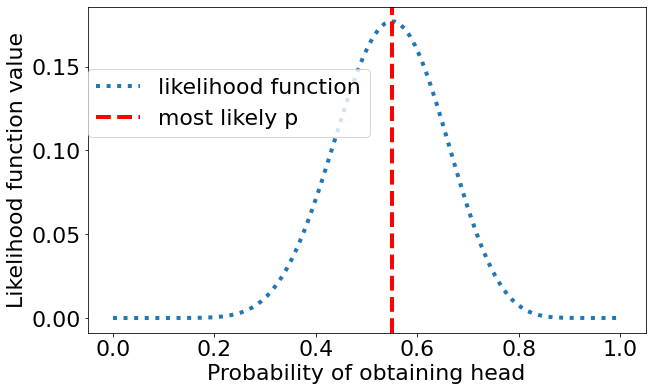

In [12]:
plt.figure(figsize=(10,6))
plt.plot(P, factor*np.power(P,11)*np.power(1-P,9),
         linestyle=":",
         linewidth=4, label="likelihood function")
plt.axvline(0.55, 
            linestyle="--",
            linewidth=4, 
            label="most likely p",
           color="r")
plt.xlabel("Probability of obtaining head")
plt.ylabel("Likelihood function value")
plt.legend(loc=[0.0,0.6]);

## MLE for Modeling Noise 
generation of noises

In [13]:
random.seed(2020)
X = np.linspace(-10,10,100)
Y = X * 0.4 + np.array([random.normalvariate(0,1) for _ in range(100)])

Plot the scattering of X and Y

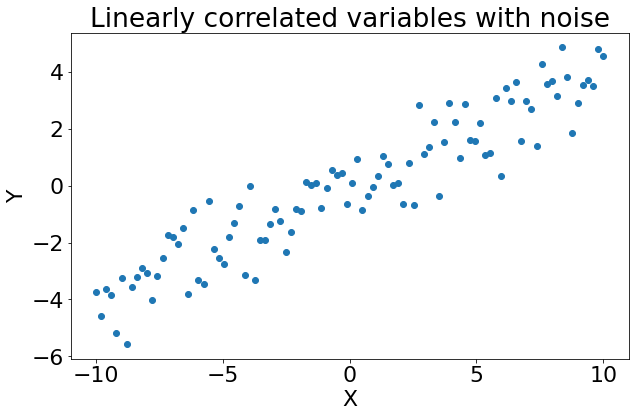

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(X,Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linearly correlated variables with noise");

Comparison of standard normal distribution and standard laplace distribution

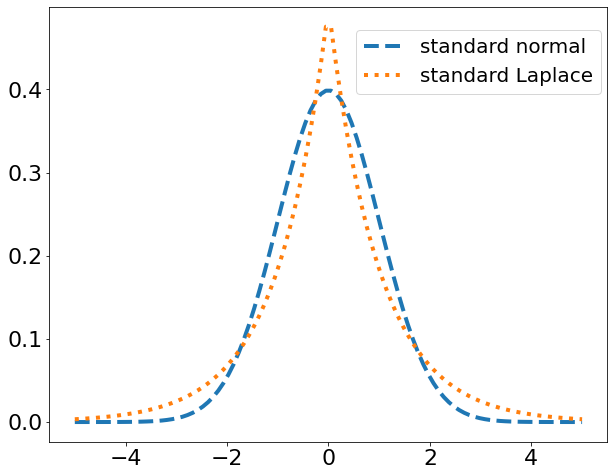

In [27]:
xs = np.linspace(-5,5,100)
normal_variables = 1/np.sqrt(2*np.pi)*np.exp(-0.5*xs**2)
laplace_variables = 0.5*np.exp(-np.abs(xs))

plt.figure(figsize=(10,8))
plt.plot(xs,normal_variables,label="standard normal",linestyle="--",linewidth=4)
plt.plot(xs,laplace_variables,label="standard Laplace",linestyle=":",linewidth=4)
plt.rcParams.update({'font.size': 20})
plt.legend(loc=[0.55,0.8]);
plt.rcParams.update({'font.size': 22})

Results under the normal distribution noise assumption

In [16]:
k_1 = np.sum(X*Y)/np.sum(X*X)
k_1 

0.40410242120384987

Visualization of first case

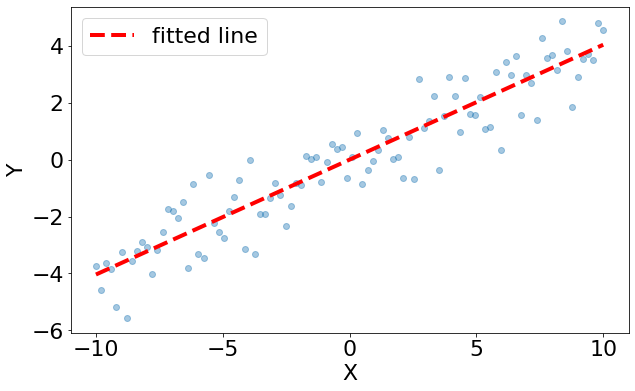

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(X,Y,alpha = 0.4)
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(X,X*k_1,linewidth=4,linestyle="--",c="r", label="fitted line")
plt.legend();

Visualization of log-likelihood function and the derivative for various k values

In [18]:
Ks = np.linspace(0.2,0.6,100)

def cal_log_likelihood(X, Y, k):
    return -np.sum(np.abs(Y-k*X))
def cal_derivative(X,Y,k):
    return np.sum(X*np.sign(Y-k*X))

Likelihoods = [cal_log_likelihood(X,Y,k) for k in Ks]
Derivatives = [cal_derivative(X,Y,k) for k in Ks]

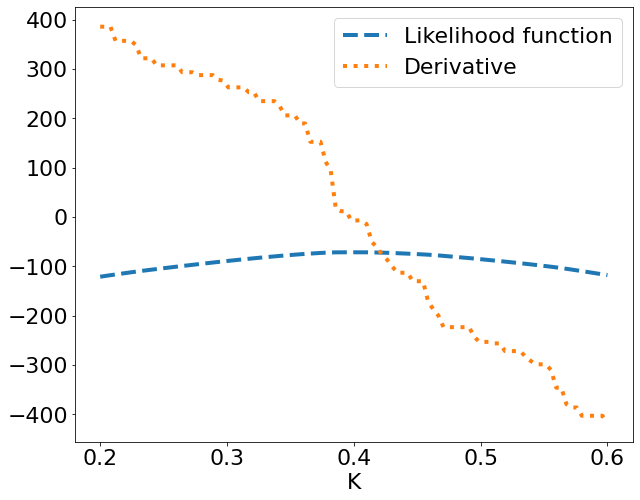

In [19]:
plt.figure(figsize=(10,8))
plt.plot(Ks,Likelihoods,label="Likelihood function",linestyle="--",linewidth=4)
plt.plot(Ks,Derivatives,label="Derivative",linestyle=":",linewidth=4)
plt.legend()
plt.xlabel("K");

Different k values may give the same values

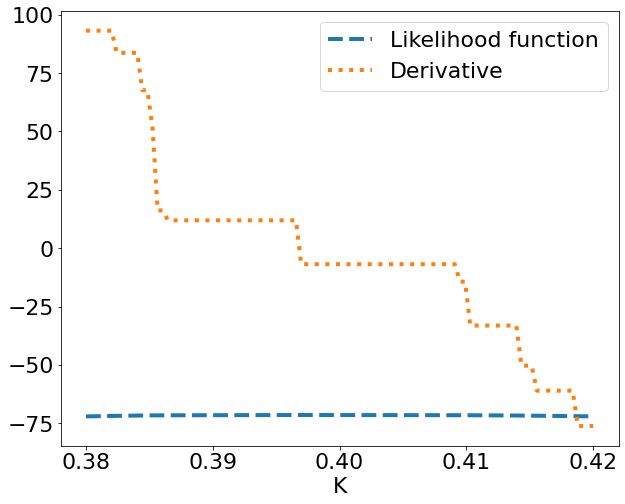

In [20]:
Ks = np.linspace(0.38,0.42,100)
Likelihoods = [cal_log_likelihood(X,Y,k) for k in Ks]
Derivatives = [cal_derivative(X,Y,k) for k in Ks]
plt.figure(figsize=(10,8))
plt.plot(Ks,Likelihoods,label="Likelihood function",linestyle="--",linewidth=4)
plt.plot(Ks,Derivatives,label="Derivative",linestyle=":",linewidth=4)
plt.legend()
plt.xlabel("K");

In [21]:
k_2 = Ks[np.argmax(Likelihoods)]
k_2

0.396969696969697

Plot both estimation together

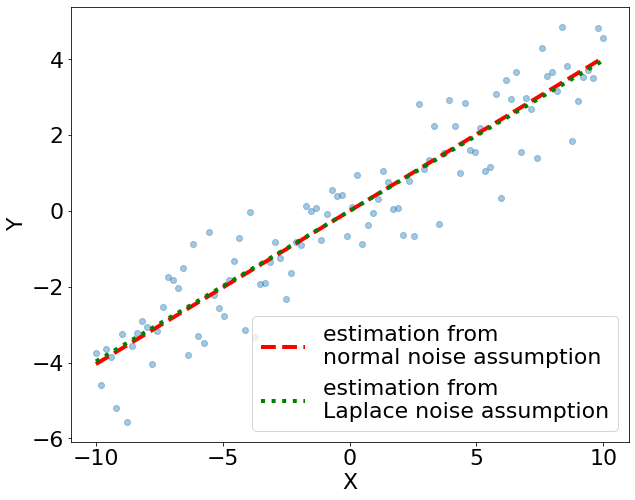

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(X,Y,alpha = 0.4)
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(X,X*k_1,linewidth=4,linestyle="--",c="r", label="estimation from \nnormal noise assumption")
plt.plot(X,X*k_2,linewidth=4,linestyle=":",c="g", label="estimation from \nLaplace noise assumption")
plt.legend();

### Monty Hall Problem

In [23]:
import random
random.seed(2020)
doors = ["A","B","C"]
count, stick, switch = 0, 0, 0
trials = []
for i in range(10000):
    prize = random.choice(doors)
    pick = random.choice(doors)
    reveal = random.choice(doors)
    trial = 1
    while reveal == prize or reveal == pick:
        reveal = random.choice(doors)
        trial+=1
    trials.append(trial)
    if reveal != pick and reveal != prize:
        count += 1
        if pick== prize:
            stick +=1
        else:
            switch += 1
print("total experiment: {}".format(count))
print("times of switch: {}".format(switch))
print("times of stick: {}".format(stick))

total experiment: 10000
times of switch: 6597
times of stick: 3403


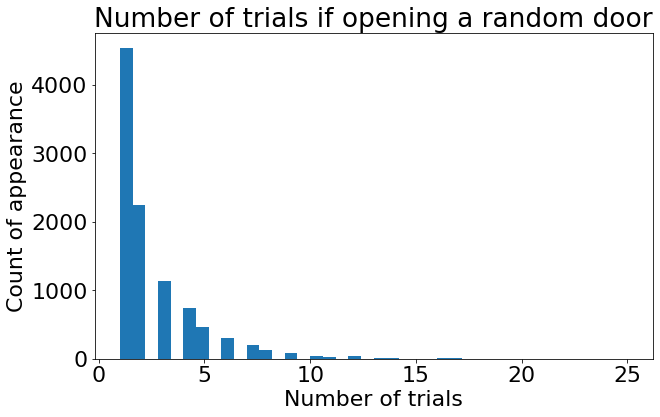

In [24]:
plt.figure(figsize=(10,6))
plt.hist(trials,bins = 40)
plt.xlabel("Number of trials")
plt.ylabel("Count of appearance")
plt.title("Number of trials if opening a random door");